In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
# %cd /content
# !unzip /content/drive/'My Drive'/data.zip

In [64]:
import os 
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from PIL import Image
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten,AveragePooling2D
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import pandas as pd

In [65]:
classe_sign = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',
            3:'Speed limit (50km/h)',
            4:'Speed limit (60km/h)',
            5:'Speed limit (70km/h)',
            6:'Speed limit (80km/h)',
            7:'End of speed limit (80km/h)',
            8:'Speed limit (100km/h)',
            9:'Speed limit (120km/h)',
           10:'No passing',
           11:'No passing veh over 3.5 tons',
           12:'Right-of-way at intersection',
           13:'Priority road',
           14:'Yield',
           15:'Stop',
           16:'No vehicles',
           17:'Veh > 3.5 tons prohibited',
           18:'No entry',
           19:'General caution',
           20:'Dangerous curve left',
           21:'Dangerous curve right',
           22:'Double curve',
           23:'Bumpy road',
           24:'Slippery road',
           25:'Road narrows on the right',
           26:'Road work',
           27:'Traffic signals',
           28:'Pedestrians',
           29:'Children crossing',
           30:'Bicycles crossing',
           31:'Beware of ice/snow',
           32:'Wild animals crossing',
           33:'End speed + passing limits',
           34:'Turn right ahead',
           35:'Turn left ahead',
           36:'Ahead only',
           37:'Go straight or right',
           38:'Go straight or left',
           39:'Keep right',
           40:'Keep left',
           41:'Roundabout mandatory',
           42:'End of no passing',
           43:'End no passing veh > 3.5 tons' }

In [66]:
label_sign=classe_sign.values()
print(label_sign)

dict_values(['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing veh over 3.5 tons', 'Right-of-way at intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Veh > 3.5 tons prohibited', 'No entry', 'General caution', 'Dangerous curve left', 'Dangerous curve right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End speed + passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End no passing veh > 3.5 tons'])


In [67]:
%cd /content/data
test=pd.read_csv('Test.csv')
y_test=np.array(test['ClassId'])
x_test=[]
path_to_test=test['Path']

for path in path_to_test:
  image=Image.open(path).convert('RGB')
  image=image.resize((32,32))
  image=np.array(image)
  x_test.append(image)
print(len(y_test))
print(len(x_test))
print(x_test[0].shape)

/content/data
12630
12630
(32, 32, 3)


In [68]:
%cd /content/data
val=pd.read_csv('Validation.csv')
y_val=np.array(val['ClassId'])
x_val=[]
path_to_val='Validation/'+val['Path']

for path in path_to_val:
  image=Image.open(path).convert('RGB')
  image=image.resize((32,32))
  image=np.array(image)
  x_val.append(image)

print(len(y_val))
print(len(x_val))
print(x_val[0].shape)

/content/data
7841
7841
(32, 32, 3)


In [69]:
%cd /content/data
x_train = []
y_train= []
classes = 43
cur_path = os.getcwd()
#Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        path_to_image=path+'/'+a
        image = Image.open("{}".format(path_to_image)).convert('RGB')              
        image = image.resize((32,32))
        image = np.array(image)
        #sim = Image.fromarray(image)
        x_train.append(image)
        y_train.append(i)
print(len(y_train))
print(len(x_train))
print(x_train[0].shape)

/content/data
31368
31368
(32, 32, 3)


/content


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Total 31368 images')

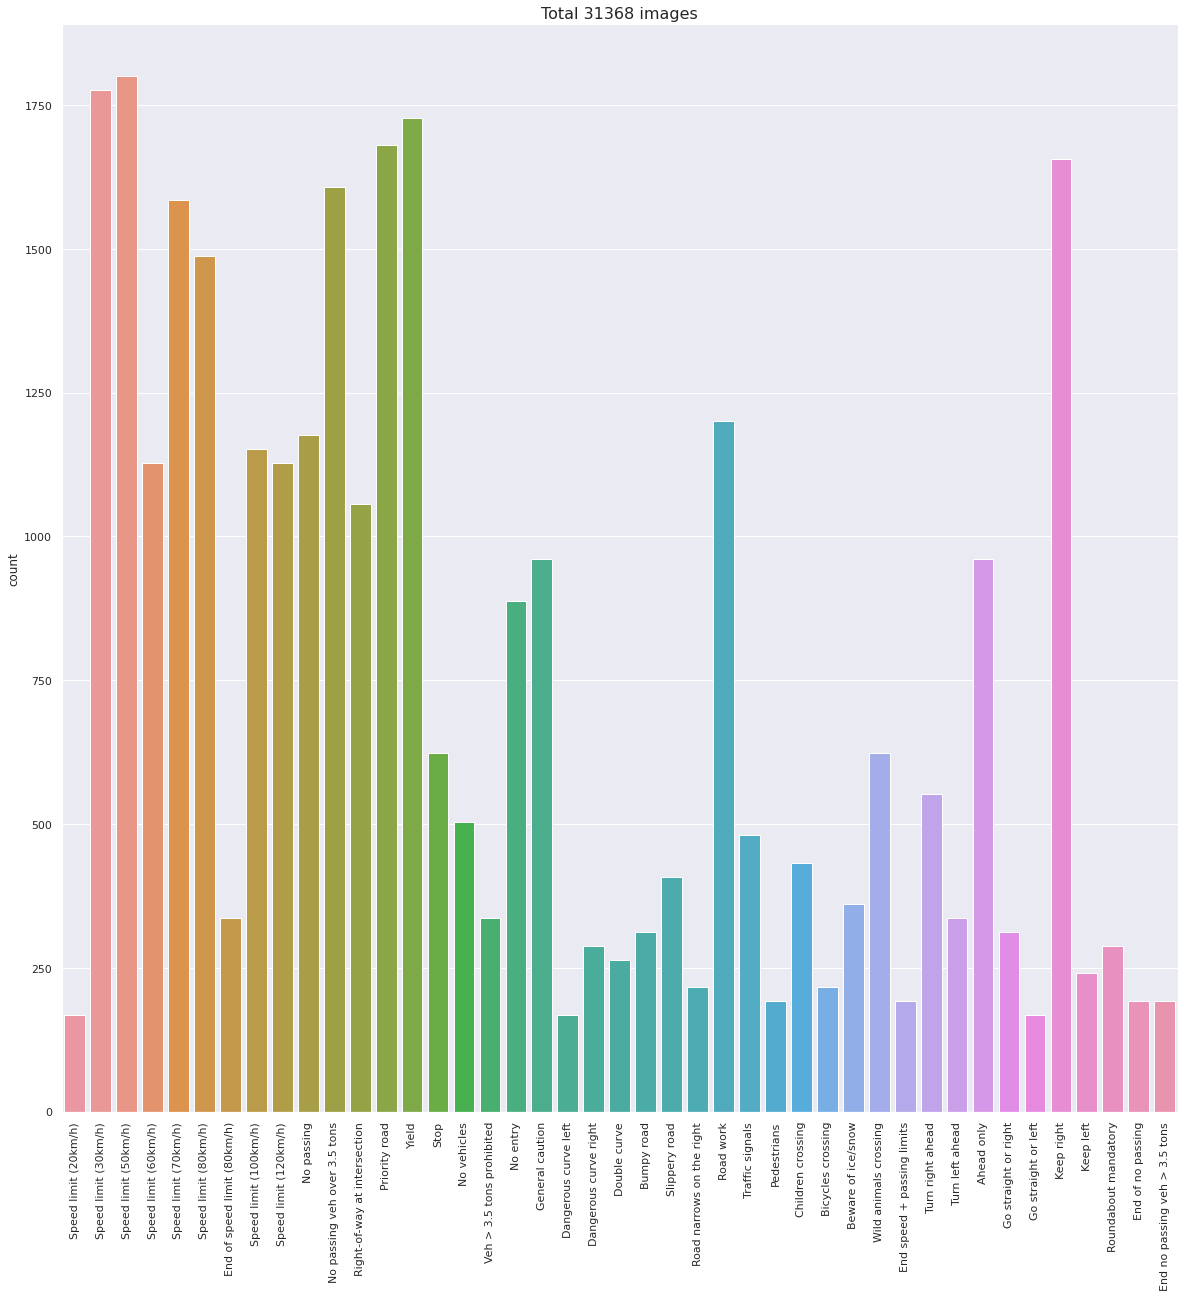

In [70]:
%cd /content
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,20))
g=sns.countplot(y_train)
g.set_xticklabels(label_sign,rotation=90)
plt.title('Total {} images'.format(len(y_train)),fontsize=16)

/content


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Total 12630 images')

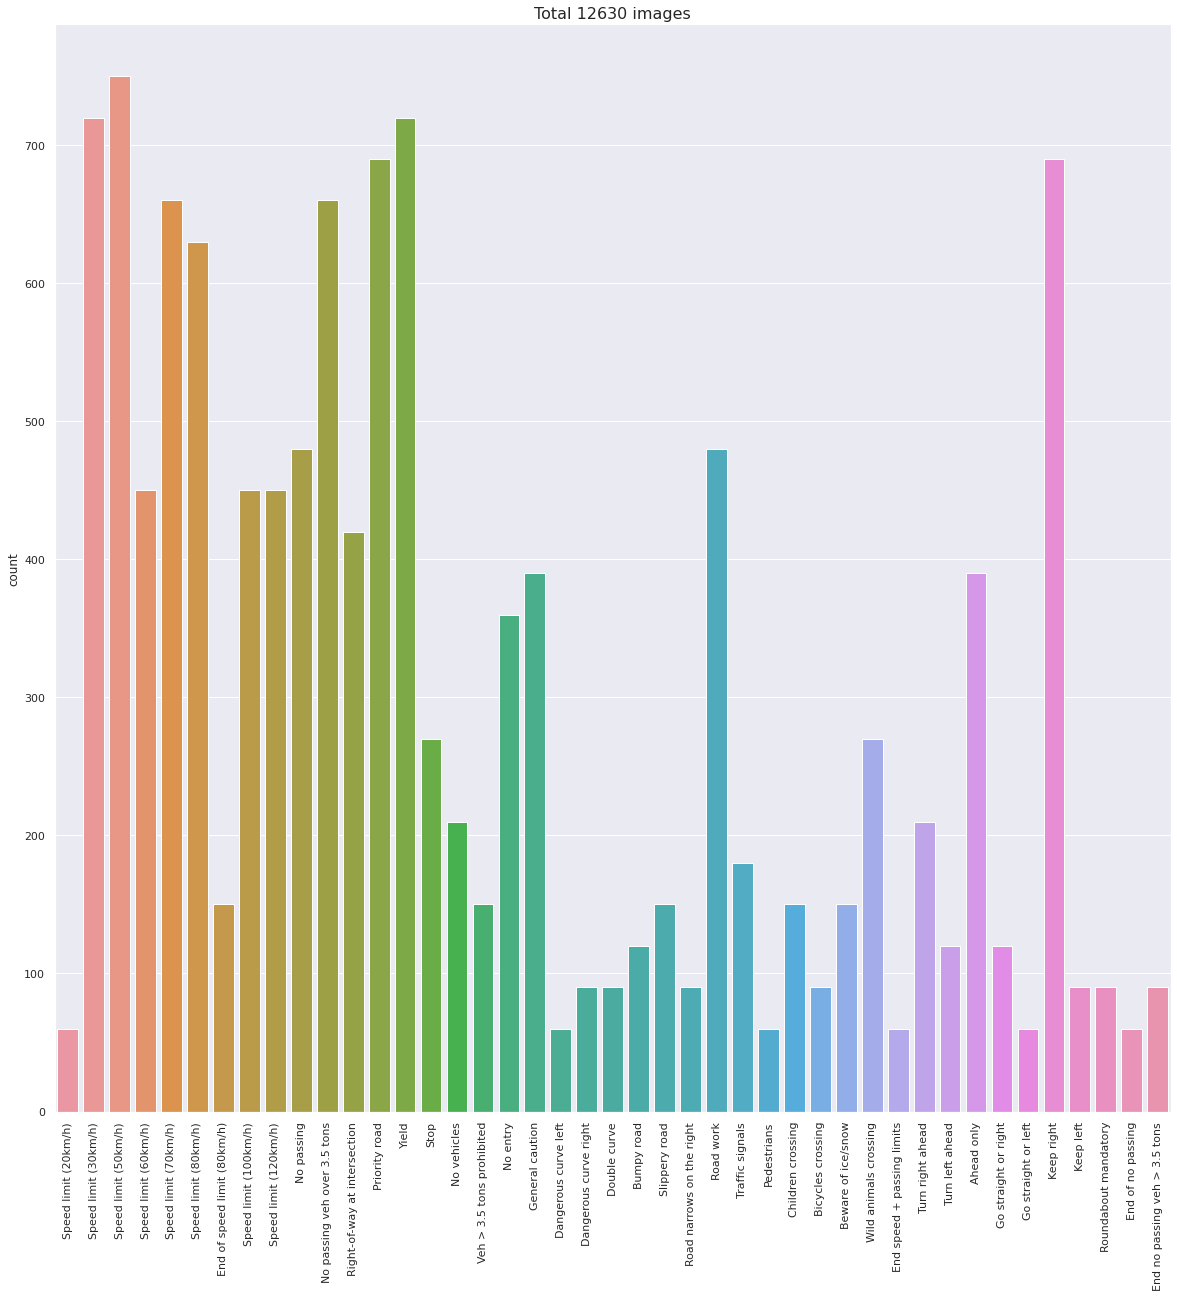

In [71]:
%cd /content
import seaborn as sns
plt.figure(figsize=(20,20))
g=sns.countplot(y_test)
g.set_xticklabels(label_sign,rotation=90)
plt.title('Total {} images'.format(len(y_test)),fontsize=16)

/content


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Total 7841 images')

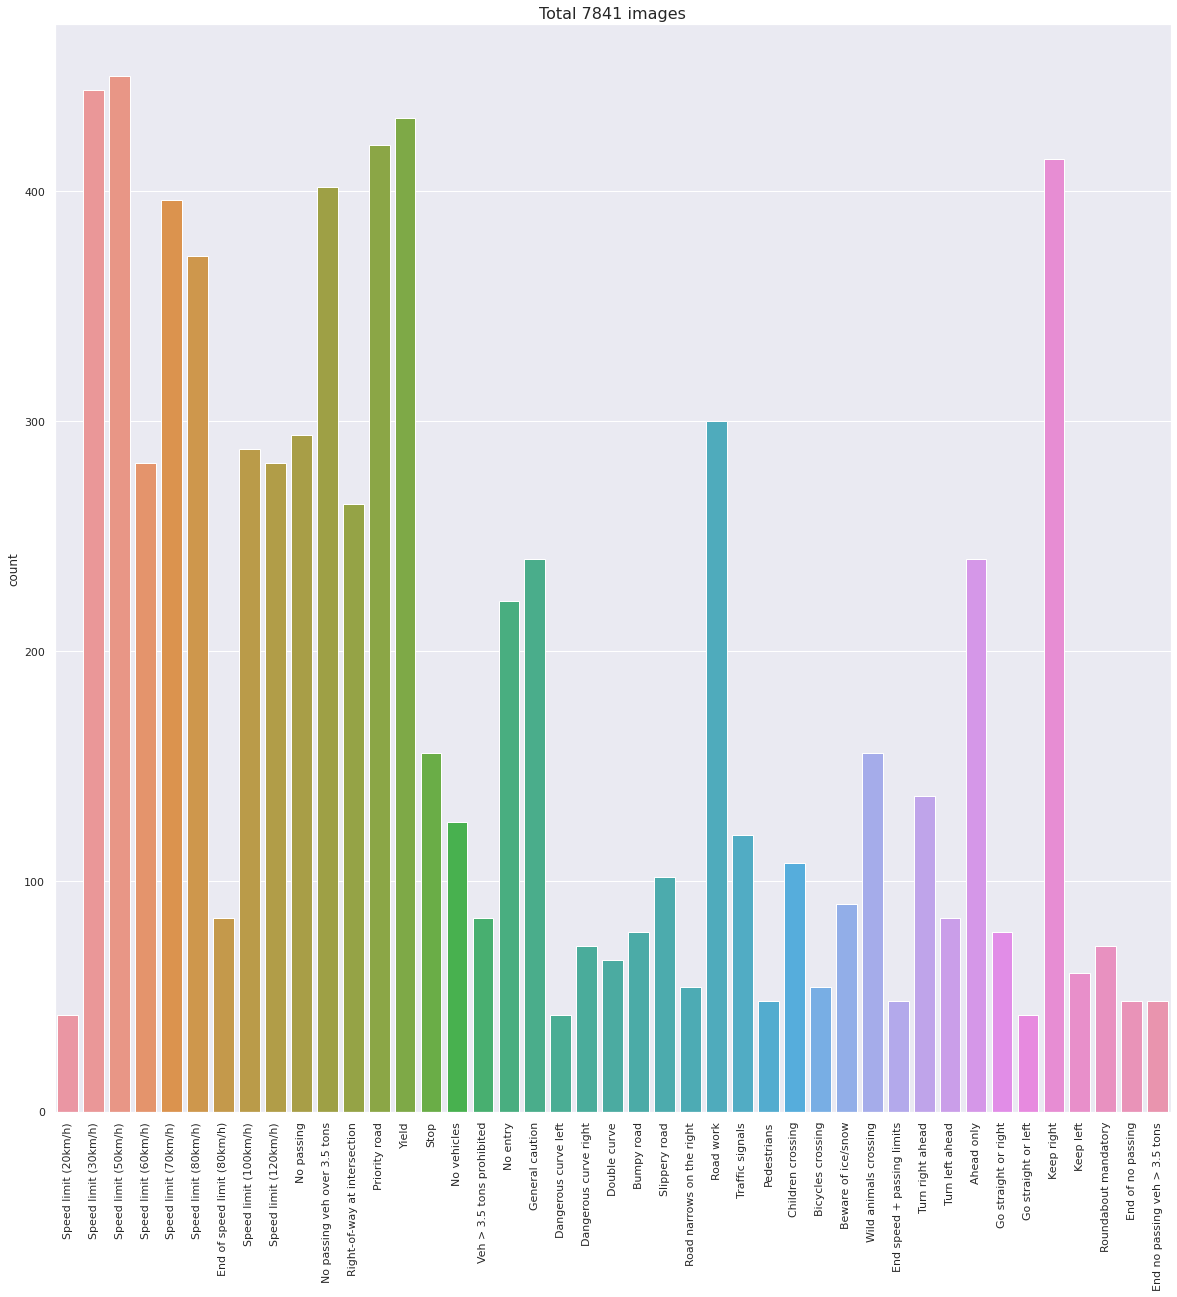

In [72]:
%cd /content
import seaborn as sns
plt.figure(figsize=(20,20))
g=sns.countplot(y_val)
g.set_xticklabels(label_sign,rotation=90)
plt.title('Total {} images'.format(len(y_val)),fontsize=16)

In [73]:
y_train=to_categorical(y_train,43)
y_val=to_categorical(y_val,43)
print(y_train.shape)
print(y_val.shape)
x_train=np.array(x_train)
x_val=np.array(x_val)
print(x_train.shape)
print(x_val.shape)

(31368, 43)
(7841, 43)
(31368, 32, 32, 3)
(7841, 32, 32, 3)


# Lenet-5 Architecture
- Layer C1: Convolution Layer (num_kernels=6, kernel_size=5×5, padding=0, stride=1)
- Layer S2: Average Pooling Layer (kernel_size=2×2, padding=0, stride=2)
- Layer C3: Convolution Layer (num_kernels=16, kernel_size=5×5, padding=0, stride=1)
- Layer S4: Average Pooling (kernel_size=2×2, padding=0, stride=2)
- Layer F5: Fully Connected Layer (out_features=120)
- Layer F6: Fully Connected Layer (out_features=80)
- Layer F7: Fully Connected Layer (out_features=43)

In [74]:
lenet_model=Sequential()
#32*32*3 ==> 28*28*6
lenet_model.add(Conv2D(filters=6,kernel_size=5,activation='relu',input_shape=x_train.shape[1:]))
#28*28*6 ==> 14*14*6
lenet_model.add(AveragePooling2D())

#14*14*6 ==> 10*10*16
lenet_model.add(Conv2D(filters=16,kernel_size=5,activation='relu'))
#10*10*16 ==> 5*5*16
lenet_model.add(AveragePooling2D())

lenet_model.add(Flatten())
lenet_model.add(Dense(120,activation='relu'))
lenet_model.add(Dense(80,activation='relu'))
lenet_model.add(Dense(43,activation='softmax'))
lenet_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [75]:
lenet_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d_4 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_7 (Dense)              (None, 80)               

In [76]:
history=lenet_model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=20)

Epoch 1/20
981/981 [==============================] - 11s 4ms/step - loss: 2.4270 - accuracy: 0.5163 - val_loss: 0.4176 - val_accuracy: 0.8878
Epoch 2/20
981/981 [==============================] - 4s 4ms/step - loss: 0.2963 - accuracy: 0.9240 - val_loss: 0.2190 - val_accuracy: 0.9439
Epoch 3/20
981/981 [==============================] - 4s 4ms/step - loss: 0.1599 - accuracy: 0.9573 - val_loss: 0.1492 - val_accuracy: 0.9625
Epoch 4/20
981/981 [==============================] - 4s 4ms/step - loss: 0.1386 - accuracy: 0.9635 - val_loss: 0.1426 - val_accuracy: 0.9652
Epoch 5/20
981/981 [==============================] - 4s 4ms/step - loss: 0.1030 - accuracy: 0.9715 - val_loss: 0.1338 - val_accuracy: 0.9654
Epoch 6/20
981/981 [==============================] - 4s 4ms/step - loss: 0.0757 - accuracy: 0.9795 - val_loss: 0.1533 - val_accuracy: 0.9681
Epoch 7/20
981/981 [==============================] - 4s 4ms/step - loss: 0.0870 - accuracy: 0.9773 - val_loss: 0.2120 - val_accuracy: 0.9550
Epoch

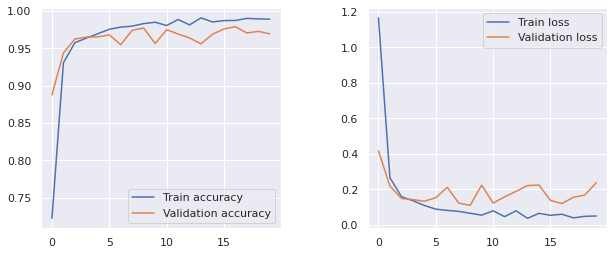

In [79]:
x_axis=np.arange(len(history.history['accuracy']))
parameters=['accuracy','val_accuracy','loss','val_loss']
names=['Train accuracy','Validation accuracy','Train loss','Validation loss']
fig=plt.subplots(figsize=(10,5))
for i in range(2):
  plt.subplot(1,2,i+1)
  plt.plot(x_axis,history.history[parameters[2*i]],label=names[2*i])
  plt.plot(x_axis,history.history[parameters[2*i+1]],label=names[2*i+1])
  plt.legend()

plt.tight_layout(pad=5.0)
plt.savefig("graph.png")
plt.show()

In [81]:
from sklearn.metrics import accuracy_score
labels_predict_for_test=np.argmax(lenet_model.predict(np.array(x_test)),axis=1)
print("Accuracy for Test:",accuracy_score(labels_predict_for_test,y_test))

Accuracy for Test: 0.9084718923198734
